####  <center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ </center> <center> ГОРОДА МОСКВЫ ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ «ПРОФЕССИОНАЛ» </center> 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Построение модели машинного обучения.Обработка естественного языка» </center>
<center> (на примере художественного произведения Чарльза Диккенса "Оливер Твист") </center> 
<center>(Oliver Twist by Charles Dickens)</center>
<center>слушателя Иванова Ивана Ивановича группы №: 0480-ГЗ </center>
 <center>программы повышения квалификации </center>
<center> «Python для машинного обучения» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center> Москва, 2021
<br>
<br>
<br>
<br>

Описание задачи:<br>
Необходимо определить наиболее часто встречающееся слово в книге Чарльза Диккенса "Оливер Твист" (Oliver Twist by Charles Dickens),   расположенной на https://www.gutenberg.org/files/730/730-h/730-h.htm с использованием NLP.<br>

<center><img src="https://raw.githubusercontent.com/Dmitry-GDG/OT-picture/main/OT2.jpg" width="350"></center>


Выполнение это задачи предполагает 
1. Посредством инструментов обработки текста выделить текст, размещенный на открытом веб-ресурсе.
2. Выполнить препроцессинг текста (токенизацию, удаление стоп-слов).
3. Провести анализ распределения слов.
4. Визуализировать результаты обработки естественного языка.
5. Сделать выводы.

Цель работы - необходимо определить наиболее часто встречающееся слово в книге Чарльза Диккенса "Оливер Твист".<br><br><br><br>

### 1. Посредством инструментов обработки текста выделим текст, размещенный на открытом веб-ресурсе.

Текст романа Чарльза Диккенса "Оливер Твист" мы можем найти на [Project Gutenberg] (https://www.gutenberg.org/files/730/730-h/730-h.htm).

Сохраним соответствующий URL-адрес в пространстве имен Python:

In [ ]:
url = "https://www.gutenberg.org/files/730/730-h/730-h.htm"

Для получения данных о книге с сайта будем использовать библиотеку Python "requests", которая упрощает эту задачу при помощи функции get. 

In [ ]:
# импортируем `requests`
import requests

# выполняем request проверяем тип объекта
r = requests.get(url)
print(r.encoding) # возвращает кодировки из заданной строки содержимого
type(r)

ISO-8859-1


requests.models.Response

ISO-8859-1 - кодировка для западноевропейских языков<br>
Мы получили объект Response после того, как выполнили запрос. Чтобы получить данные из объекта ответа, нам нужно получить доступ к нужному нам свойству. Нам нужен текст. Получим его:

In [ ]:
html = r.text
# print(html) - распечатывать не будем в связи с большим объёмом текста

Чтобы извлечь сам роман из HTML-текста, распакуем этот HTML-код.

**Обработка текста**

Для распаковки HTML-текста нам потребуется библиотека Pyton `BeautifulSoup`, предназначенная для быстрого выполнения проектов, таких как очистка экрана. Особенности этой библтотеки:
1. Beautiful Soup предоставляет несколько простых методов и идиом Pythonic для навигации, поиска и изменения дерева синтаксического анализа: набор инструментов для анализа документа и извлечения того, что нам нужно. Для написания приложения не требуется много кода
2. Beautiful Soup автоматически конвертирует входящие документы в Unicode, а исходящие - в UTF-8. Нам не нужно думать о кодировках, если в документе не указана кодировка и Beautiful Soup не может ее обнаружить. Тогда нам просто нужно указать исходную кодировку.
3. Beautiful Soup расположен поверх популярных парсеров Python, таких как lxml и html5lib , что позволяет нам опробовать различные стратегии синтаксического анализа.

In [ ]:
# импортируем BeautifulSoup из bs4
from bs4 import BeautifulSoup

# применим библиотеку BeautifulSoup к нашему файлу html, используем парсер html5lib
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

Тип полученного объекта - bs4.BeautifulSoup. Из таких объектов мы можем извлечь любую интересующую нас информацию о веб-сайте. Мы хотим извлечь текст из объекта, для чего будем использовать метод .get_text()

In [ ]:
text = soup.get_text()
# print(text)  # - распечатывать не будем в связи с большим объёмом текста

Посчитаем общее количество слов в романе:

In [ ]:
    words_count = len(text.split())
    print ('Общее количество слов в романе Чарльза Диккенса "Оливер Твист"', words_count, 'слова')

Общее количество слов в романе Чарльза Диккенса "Оливер Твист" 161202 слова


****Промежуточный итог****: Для нашего романа "Оливер Твист" мы проанализировали HTML и извлекли текст романа, посчитали общее количество слов в романе. Общее количество слов в романе - 161202 слова. <br><br>

### 2. Предпроцессинг

Извлечем список слов в романе "Оливер Твист" и найдём самое часто встречающееся в романе слово. <br>
Для этого используем обработку естественного языка и токенизацию.

Мы будем использовать библиотеку инструментов для естественного языка nltk (Natural Language Toolkit). С её помощью мы:
1. Разделим текст на слова-токены
2. Переведём все слова в нижний регистр букв
3. Удалим игнорируемые слова (стоп-слова), такие слова, которые часто встречаются почти во всех англоязычных текстах: «a», «the» и т.п.

Извлечем список слов в романе "Оливер Твист" с помощью nltk - набора инструментов для естественного языка и напечатаем несколько слов (для примера):

In [ ]:
# импортируем RegexpTokenizer из nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# создаём tokenizer
tokenizer = RegexpTokenizer('\w+')

# создаём tokens
tokens = tokenizer.tokenize(text)
tokens[2003:2015]

['She',
 'was',
 'found',
 'lying',
 'in',
 'the',
 'street',
 'She',
 'had',
 'walked',
 'some',
 'distance']

<br>Следующим шагом нам необходимо перевести все слова романа в нижний регистр, что поможет исключить повторение слов, написанные с маленькой буквы и большой буквы, например, в начале предложения. Для этого воспользуемся методом .lower()

In [ ]:
# инициализируем новый список
words = []

# переберём все слова списка tokens и переведём все слова в нижний регистр
for word in tokens:
    words.append(word.lower())

# выведем несколько элементов из списка в качестве проверки работоспособности
words[2003:2015]

['she',
 'was',
 'found',
 'lying',
 'in',
 'the',
 'street',
 'she',
 'had',
 'walked',
 'some',
 'distance']

Мы видим, что теперь все слова записаны с маленькой буквы, даже слова, которые ранее были написаны с большой буквы.<br> 



Следующим шагом удалим игнорируемые слова (стоп-слова), такие слова, которые часто встречаются почти во всех англоязычных текстах: «a», «the», «of» и т.п., потому что они нам не так интересны.

<br><br>В пакете nltk есть список стоп-слов на английском языке, который мы теперь сохраним как sw и распечатаем первые несколько элементов:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# получим английские стоп-слова, сохраним их как sw и напечатаем несколько из них
sw = nltk.corpus.stopwords.words('english')
sw[:6]

['i', 'me', 'my', 'myself', 'we', 'our']

In [ ]:
print('Всего в данном случае мы имеем', len(sw), 'английских стоп-слов.')

Всего в данном случае мы имеем 179 английских стоп-слов.


In [ ]:
# инициализируем новый список
words_ns = []

# добавляем в наш новый список только те слова нашего романа, которых нет в списке стоп-слов
for word in words:
    if word not in sw:
        words_ns.append(word)

# выведем несколько элементов из списка в качестве проверки работоспособности
words_ns[1122:1129]

['order', 'found', 'lying', 'street', 'walked', 'distance', 'shoes']

In [ ]:
print('После  удаления из текста стоп-слов в тексте осталось', len(words_ns), 'слов')

После  удаления из текста стоп-слов в тексте осталось 80112 слов


После исключения стоп-слов общее количество слов в книге сократилось более, чем в два раза.<br>
На данном этапе мы получили список всех слов романа, исключили из него слова, которые нас не интересуют.<br><br><br><br>

### 3. Визуализация

Следующим шагом построим график частотного распределения слов в романе "Оливер Твист".<br>
Мы можем построить частотное распределение слов в романе в двух строках кода, используя nltk. <br>


*   создадим объект частотного распределения используя метод FreqDist()
*   используя метод plot построим график
 
Команда %matplotlib inline указывает, что график необходимо построить все в той же оболочке Jupiter или Colab, но теперь он выводится как обычная картинка.

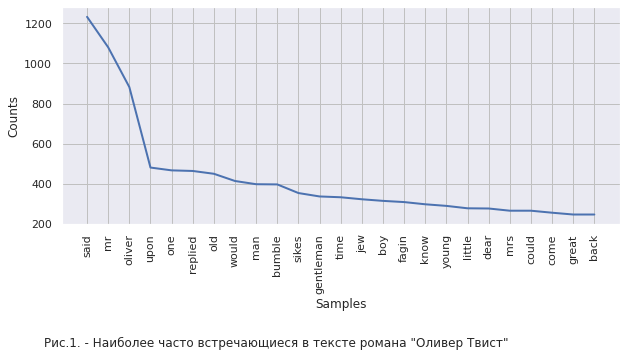

In [ ]:
# импортируем библиотеки для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# магическая команда для построения графика в виде картинки
%matplotlib inline
# sns.set() - это псевдоним для seaborn.set_theme
# для установки несколько параметров темы за один шаг.
sns.set(palette='deep')
plt.figure(figsize=(10,4))
plt.figtext(0.1, -0.3, 'Рис.1. - Наиболее часто встречающиеся в тексте романа "Оливер Твист"')

# создадим объект частотного распределения
freqdist1 = nltk.FreqDist(words_ns)
# построим график для 25 наиболее часто употребляемых слов
freqdist1.plot(25)

**Результат:** Самое часто используемое в романе слово said, оно используется в романе более 1200 раз.

Добавим в наши расчеты еще один словарь стоп-слов из библиотеки sklearn и посмотрим, как изменится результат:

In [ ]:
# импортируем стоп-слова из библиотеки sklearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# добавляем эти новые стоп слова в наш новый словарь стоп-слов sw2
sw2 = set(sw + list(ENGLISH_STOP_WORDS))

print('После добавления нового словаря стоп-слов всего мы имеем уже', len(sw2), 'английских стоп-слов.')

После добавления нового словаря стоп-слов всего мы имеем уже 378 английских стоп-слов.


Посмотрим, как изменится результат после исключения из текста романа нового набора стоп-слов:

In [ ]:
# инициализируем новый список
words_ns2 = []

# добавляем в наш новый список только те слова нашего романа, которых нет в списке стоп-слов
for word in words:
    if word not in sw2:
        words_ns2.append(word)

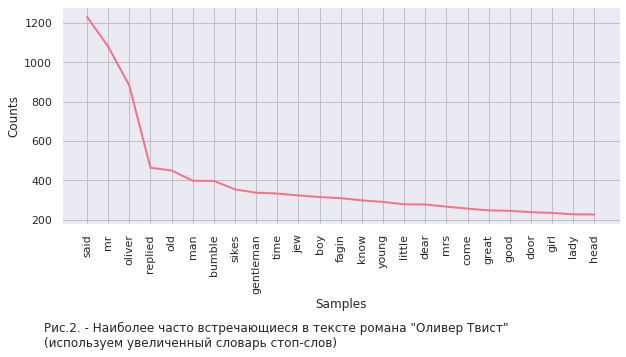

In [ ]:
# создадим объект частотного распределения
freqdist2 = nltk.FreqDist(words_ns2)
# построим график для 25 наиболее часто употребляемых слов
sns.set(palette='husl')
plt.figure(figsize=(10,4))
plt.figtext(0.1, -0.3, 'Рис.2. - Наиболее часто встречающиеся в тексте романа "Оливер Твист"\n' 
'(используем увеличенный словарь стоп-слов)')
freqdist2.plot(25)

**Результат:** мы видим, что из списка исключились несколько новых стоп-слов, которые ранее были в лидерах по частотности употребления в романе (слова upon, one, would, could, back и др.).<br>

### 4. Проведём анализ распределения слов.

Выведем срез из десяти наиболее часто употребляемых в романе слов в порядке убывания количества повторений:

In [ ]:
print(sorted(freqdist2, key=freqdist2.get, reverse=True)[:10])

['said', 'mr', 'oliver', 'replied', 'old', 'man', 'bumble', 'sikes', 'gentleman', 'time']


Выведем количества повторений для каждого из наиболее часто встречающегося в романе слова (в порядке убывания количества раз использования):

In [ ]:
freqdist2.most_common(10)
print('Наиболее часто использованные в романе "Оливер Твист" слова:')
for i in freqdist2.most_common(10):
    print('количество раз использования слова', ': '.join([str(j) for j in i]), end='\n')

Наиболее часто использованные в романе "Оливер Твист" слова:
количество раз использования слова said: 1232
количество раз использования слова mr: 1080
количество раз использования слова oliver: 882
количество раз использования слова replied: 464
количество раз использования слова old: 450
количество раз использования слова man: 398
количество раз использования слова bumble: 397
количество раз использования слова sikes: 354
количество раз использования слова gentleman: 337
количество раз использования слова time: 333


Какое слово является наиболее часто употребляемым в романе и сколько раз употребляется в романе это слово?

In [ ]:
newfd2_max = max(freqdist2, key=freqdist2.get)
print('Самое часто используемое в романе "Оливер Твист" слово', newfd2_max +', \n'
'оно используется в романе', freqdist2[newfd2_max], 'раза')

Самое часто используемое в романе "Оливер Твист" слово said, 
оно используется в романе 1232 раза


**Результат:** 
Самым частотным по употреблению в романе "Оливер Твист" является слово said, которое употребляется в романе 1232 раза.

### 5. Вывод

В этой работе мы:
- выбрали необходимую нам книгу - роман Чарльза Диккенса "Оливер Твист" на сайте Project Gutenberg;<br>
- разобрали html и извлекли текст романа;<br>
- посчитали общее количество слов в романе. Всего в романе 161202 слова;<br>
- использовали токенизацию для извлечения списка слов в романе;<br>
- перевели все слова романа в нижний регистр (в строчные буквы);<br>
- удалили стоп-слова, такие как «а» и «the» и др. из списка слов романа;<br>
- построили график частотного распределения слов в романе;<br>
- нашли самое часто использованное в романе "Оливер Твист" слово. Таким словом является слово said, которое повторяется в романе более 1200 раз.<br>

<br><br><br>
<br>
<br>
<br>
<center>Список литературы</center>

1. Документация по пакету Requests: HTTP for Humans™ https://docs.python-requests.org/en/master/
2. Документация по пакету Beautiful Soup http://wiki.python.su/%D0%94%D0%BE%D0%BA%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8/BeautifulSoup
2. Андреас, Мюллер Введение в машинное обучение с помощью Python. Руководство для специалистов по работе с данными. - М.: Альфа-книга, 2017.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
1. Бринк Хенрик, Ричардс Джозеф, Феверолф Марк, Машинное обучение. -СПб.: Питер, 2017. 
2. Бурков Андрей, Машинное обучение без лишних слов. — СПб.: Питер, 2020. 
3. Джоши П.,  Искусственный интеллект с примерами. —   Диалектика/Вильямс, 2019.
4. Дэвидсон-Пайлон К., Вероятностное программирование на Python: байесовский вывод и алгоритмы. — СПб.: Питер, 2019. 
5. Жерон, Орелье, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow: концепции, инструменты и техники для создания интеллектуальных систем. Пер. с англ. - СПб.: ООО "Альфа-книга',  2018. 
6. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
7.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
8. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
9.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 